In [1]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import random
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### For visualizing the outputs ###
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import matplotlib
from sklearn.utils import shuffle
import matplotlib.image as mpimg

In [2]:
dataDir='./COCOdataset2014'
dataType='train'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

# Initialize the COCO api for instance annotations
coco=COCO(annFile)

# Load the categories in a variable
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)



loading annotations into memory...
Done (t=9.67s)
creating index...
index created!


In [3]:
print(cats)

[{'supercategory': 'person', 'id': 1, 'name': 'person'}, {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}, {'supercategory': 'vehicle', 'id': 3, 'name': 'car'}, {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}, {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}, {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}, {'supercategory': 'vehicle', 'id': 7, 'name': 'train'}, {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}, {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}, {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}, {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}, {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}, {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}, {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}, {'supercategory': 'animal', 'id': 16, 'name': 'bird'}, {'supercategory': 'animal', 'id': 17, 'name': 'cat'}, {'supercategory': 'animal', 'id': 18, 'name': 'dog'}, {'supercategory

In [4]:

def getClassName(classID, cats):
    for i in range(len(cats)):
        if cats[i]['id']==classID:
            return cats[i]['name']
    return "None"
print('The class name is', getClassName(52, cats))


The class name is banana


Number of images containing all the  classes: 1062


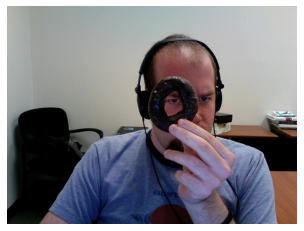

In [9]:
classname = 'donut'
filterClasses = [classname]

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses) 
# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))

# load and display a random image
img = coco.loadImgs(imgIds[324])[0]
I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.show() 

(375, 500, 3)

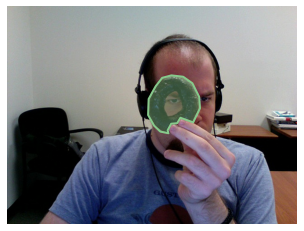

In [9]:
plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)
I.shape

In [10]:
classes = [classname]

images = []
if classes!=None:
    # iterate for each individual class in the list
    for className in classes:
        # get all images containing given class
        catIds = coco.getCatIds(catNms=className)
        imgIds = coco.getImgIds(catIds=catIds)
        images += coco.loadImgs(imgIds)
else:
    imgIds = coco.getImgIds()
    images = coco.loadImgs(imgIds)
    
# Now, filter out the repeated images    
unique_images = []
for i in range(len(images)):
    if images[i] not in unique_images:
        unique_images.append(images[i])

dataset_size = len(unique_images)

print("Number of images containing the filter classes:", dataset_size)

Number of images containing the filter classes: 1062


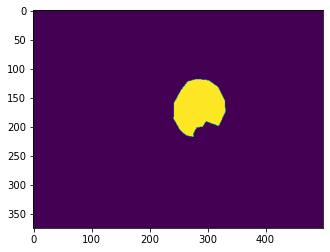

In [11]:
filterClasses = [classname]
mask = np.zeros((img['height'],img['width']))
for i in range(len(anns)):
    className = getClassName(anns[i]['category_id'], cats)
    pixel_value = filterClasses.index(className)+1
    mask = np.maximum(coco.annToMask(anns[i])*pixel_value, mask)
plt.imshow(mask)

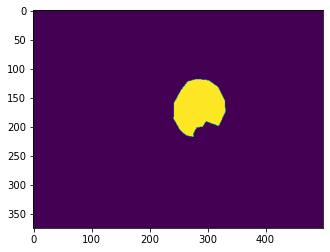

In [12]:
mask = np.zeros((img['height'],img['width']))
for i in range(len(anns)):
    mask = np.maximum(coco.annToMask(anns[i]), mask)
plt.imshow(mask)

In [13]:
mask.shape

(375, 500)

In [14]:

x = np.empty((mask.shape[0],mask.shape[1],3))
x[:,:,0] = mask
x[:,:,1] = mask
x[:,:,2] = mask

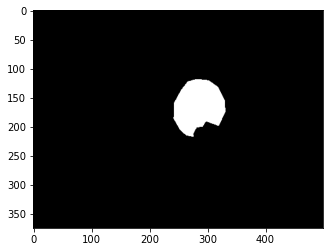

In [15]:
plt.imshow(x)

In [16]:
x = x * I

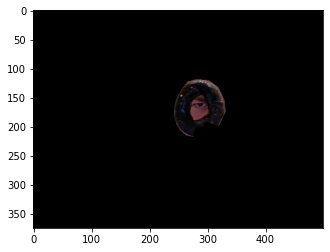

In [17]:
plt.imshow(x)

Number of images containing all the  classes: 1062


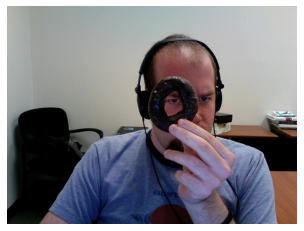

Number of images containing the filter classes: 1062
Floating point image RGB values must be in the 0..1 range.
Floating point image RGB values must be in the 0..1 range.
Floating point image RGB values must be in the 0..1 range.
Floating point image RGB values must be in the 0..1 range.
Floating point image RGB values must be in the 0..1 range.
Floating point image RGB values must be in the 0..1 range.
Floating point image RGB values must be in the 0..1 range.
Floating point image RGB values must be in the 0..1 range.
Floating point image RGB values must be in the 0..1 range.
Floating point image RGB values must be in the 0..1 range.
Floating point image RGB values must be in the 0..1 range.
Floating point image RGB values must be in the 0..1 range.
Floating point image RGB values must be in the 0..1 range.
Floating point image RGB values must be in the 0..1 range.
Floating point image RGB values must be in the 0..1 range.
Floating point image RGB values must be in the 0..1 range.
Flo

In [20]:
classname = 'donut'
filterClasses = [classname]

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses) 
# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))

# load and display a random image
img = coco.loadImgs(imgIds[324])[0]
I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.show() 

classes = [classname]

images = []
if classes!=None:
    # iterate for each individual class in the list
    for className in classes:
        # get all images containing given class
        catIds = coco.getCatIds(catNms=className)
        imgIds = coco.getImgIds(catIds=catIds)
        images += coco.loadImgs(imgIds)
else:
    imgIds = coco.getImgIds()
    images = coco.loadImgs(imgIds)
    
# Now, filter out the repeated images    
unique_images = []
for i in range(len(images)):
    if images[i] not in unique_images:
        unique_images.append(images[i])

dataset_size = len(unique_images)

print("Number of images containing the filter classes:", dataset_size)

images = []
x = 0
for j in unique_images:  
    try:
        I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,j['file_name']))/255.0 
        mask = np.zeros((j['height'],j['width']))
        annIds = coco.getAnnIds(imgIds=j['id'], catIds=catIds, iscrowd=None)
        anns = coco.loadAnns(annIds)
        for i in range(len(anns)):
            className = getClassName(anns[i]['category_id'], cats)
            pixel_value = filterClasses.index(className)+1
            mask = np.maximum(coco.annToMask(anns[i])*pixel_value, mask)
        emask = np.empty((mask.shape[0],mask.shape[1],3))
        emask[:,:,0] = mask
        emask[:,:,1] = mask
        emask[:,:,2] = mask
        emask = emask * I   
        x = x + 1 
        images.append(emask) 
    except:
        pass
    
for i in range(0,len(images)):
    try:
        matplotlib.image.imsave('{cname}/{cname}{no}.png'.format(cname = classname, no = i), cv2.resize(images[i],(250, 250), interpolation = cv2.INTER_AREA))
    except Exception as e: 
        pass

Number of images containing all the  classes: 2080


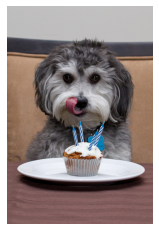

Number of images containing the filter classes: 2080


In [22]:
classname = 'cake'
filterClasses = [classname]

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses) 
# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))

# load and display a random image
img = coco.loadImgs(imgIds[324])[0]
I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.show() 

classes = [classname]

images = []
if classes!=None:
    # iterate for each individual class in the list
    for className in classes:
        # get all images containing given class
        catIds = coco.getCatIds(catNms=className)
        imgIds = coco.getImgIds(catIds=catIds)
        images += coco.loadImgs(imgIds)
else:
    imgIds = coco.getImgIds()
    images = coco.loadImgs(imgIds)
    
# Now, filter out the repeated images    
unique_images = []
for i in range(len(images)):
    if images[i] not in unique_images:
        unique_images.append(images[i])

dataset_size = len(unique_images)

print("Number of images containing the filter classes:", dataset_size)

images = []
x = 0
for j in unique_images:  
    try:
        I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,j['file_name']))/255.0 
        mask = np.zeros((j['height'],j['width']))
        annIds = coco.getAnnIds(imgIds=j['id'], catIds=catIds, iscrowd=None)
        anns = coco.loadAnns(annIds)
        for i in range(len(anns)):
            className = getClassName(anns[i]['category_id'], cats)
            pixel_value = filterClasses.index(className)+1
            mask = np.maximum(coco.annToMask(anns[i])*pixel_value, mask)
        emask = np.empty((mask.shape[0],mask.shape[1],3))
        emask[:,:,0] = mask
        emask[:,:,1] = mask
        emask[:,:,2] = mask
        emask = emask * I   
        x = x + 1 
        images.append(emask) 
    except:
        pass
    
for i in range(0,len(images)):
    try:
        matplotlib.image.imsave('{cname}/{cname}{no}.png'.format(cname = classname, no = i), cv2.resize(images[i],(250, 250), interpolation = cv2.INTER_AREA))
    except Exception as e: 
        pass

Number of images containing all the  classes: 1171


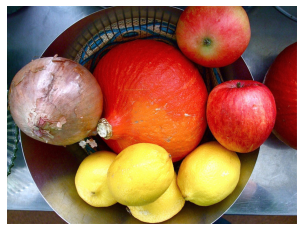

Number of images containing the filter classes: 1171


In [24]:
classname = 'apple'
filterClasses = [classname]

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses) 
# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))

# load and display a random image
img = coco.loadImgs(imgIds[324])[0]
I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.show() 

classes = [classname]

images = []
if classes!=None:
    # iterate for each individual class in the list
    for className in classes:
        # get all images containing given class
        catIds = coco.getCatIds(catNms=className)
        imgIds = coco.getImgIds(catIds=catIds)
        images += coco.loadImgs(imgIds)
else:
    imgIds = coco.getImgIds()
    images = coco.loadImgs(imgIds)
    
# Now, filter out the repeated images    
unique_images = []
for i in range(len(images)):
    if images[i] not in unique_images:
        unique_images.append(images[i])

dataset_size = len(unique_images)

print("Number of images containing the filter classes:", dataset_size)

images = []
x = 0
for j in unique_images:  
    try:
        I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,j['file_name']))/255.0 
        mask = np.zeros((j['height'],j['width']))
        annIds = coco.getAnnIds(imgIds=j['id'], catIds=catIds, iscrowd=None)
        anns = coco.loadAnns(annIds)
        for i in range(len(anns)):
            className = getClassName(anns[i]['category_id'], cats)
            pixel_value = filterClasses.index(className)+1
            mask = np.maximum(coco.annToMask(anns[i])*pixel_value, mask)
        emask = np.empty((mask.shape[0],mask.shape[1],3))
        emask[:,:,0] = mask
        emask[:,:,1] = mask
        emask[:,:,2] = mask
        emask = emask * I   
        x = x + 1 
        images.append(emask) 
    except:
        pass
    
for i in range(0,len(images)):
    try:
        matplotlib.image.imsave('{cname}/{cname}{no}.png'.format(cname = classname, no = i), cv2.resize(images[i],(250, 250), interpolation = cv2.INTER_AREA))
    except Exception as e: 
        pass

Number of images containing all the  classes: 1618


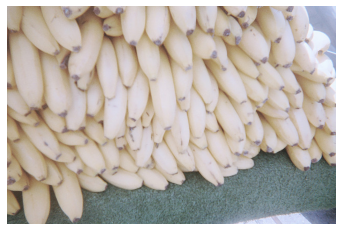

Number of images containing the filter classes: 1618


In [25]:
classname = 'banana'
filterClasses = [classname]

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses) 
# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))

# load and display a random image
img = coco.loadImgs(imgIds[324])[0]
I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.show() 

classes = [classname]

images = []
if classes!=None:
    # iterate for each individual class in the list
    for className in classes:
        # get all images containing given class
        catIds = coco.getCatIds(catNms=className)
        imgIds = coco.getImgIds(catIds=catIds)
        images += coco.loadImgs(imgIds)
else:
    imgIds = coco.getImgIds()
    images = coco.loadImgs(imgIds)
    
# Now, filter out the repeated images    
unique_images = []
for i in range(len(images)):
    if images[i] not in unique_images:
        unique_images.append(images[i])

dataset_size = len(unique_images)

print("Number of images containing the filter classes:", dataset_size)

images = []
x = 0
for j in unique_images:  
    try:
        I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,j['file_name']))/255.0 
        mask = np.zeros((j['height'],j['width']))
        annIds = coco.getAnnIds(imgIds=j['id'], catIds=catIds, iscrowd=None)
        anns = coco.loadAnns(annIds)
        for i in range(len(anns)):
            className = getClassName(anns[i]['category_id'], cats)
            pixel_value = filterClasses.index(className)+1
            mask = np.maximum(coco.annToMask(anns[i])*pixel_value, mask)
        emask = np.empty((mask.shape[0],mask.shape[1],3))
        emask[:,:,0] = mask
        emask[:,:,1] = mask
        emask[:,:,2] = mask
        emask = emask * I   
        x = x + 1 
        images.append(emask) 
    except:
        pass
    
for i in range(0,len(images)):
    try:
        matplotlib.image.imsave('{cname}/{cname}{no}.png'.format(cname = classname, no = i), cv2.resize(images[i],(250, 250), interpolation = cv2.INTER_AREA))
    except Exception as e: 
        pass

Number of images containing all the  classes: 1340


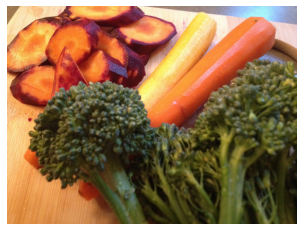

Number of images containing the filter classes: 1340


In [26]:
classname = 'broccoli'
filterClasses = [classname]

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses) 
# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))

# load and display a random image
img = coco.loadImgs(imgIds[324])[0]
I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.show() 

classes = [classname]

images = []
if classes!=None:
    # iterate for each individual class in the list
    for className in classes:
        # get all images containing given class
        catIds = coco.getCatIds(catNms=className)
        imgIds = coco.getImgIds(catIds=catIds)
        images += coco.loadImgs(imgIds)
else:
    imgIds = coco.getImgIds()
    images = coco.loadImgs(imgIds)
    
# Now, filter out the repeated images    
unique_images = []
for i in range(len(images)):
    if images[i] not in unique_images:
        unique_images.append(images[i])

dataset_size = len(unique_images)

print("Number of images containing the filter classes:", dataset_size)

images = []
x = 0
for j in unique_images:  
    try:
        I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,j['file_name']))/255.0 
        mask = np.zeros((j['height'],j['width']))
        annIds = coco.getAnnIds(imgIds=j['id'], catIds=catIds, iscrowd=None)
        anns = coco.loadAnns(annIds)
        for i in range(len(anns)):
            className = getClassName(anns[i]['category_id'], cats)
            pixel_value = filterClasses.index(className)+1
            mask = np.maximum(coco.annToMask(anns[i])*pixel_value, mask)
        emask = np.empty((mask.shape[0],mask.shape[1],3))
        emask[:,:,0] = mask
        emask[:,:,1] = mask
        emask[:,:,2] = mask
        emask = emask * I   
        x = x + 1 
        images.append(emask) 
    except:
        pass
    
for i in range(0,len(images)):
    try:
        matplotlib.image.imsave('{cname}/{cname}{no}.png'.format(cname = classname, no = i), cv2.resize(images[i],(250, 250), interpolation = cv2.INTER_AREA))
    except Exception as e: 
        pass

Number of images containing all the  classes: 1216


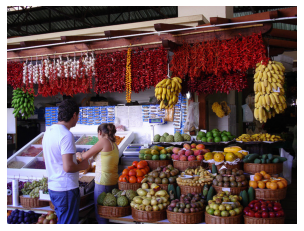

Number of images containing the filter classes: 1216


In [27]:
classname = 'orange'
filterClasses = [classname]

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses) 
# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))

# load and display a random image
img = coco.loadImgs(imgIds[324])[0]
I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.show() 

classes = [classname]

images = []
if classes!=None:
    # iterate for each individual class in the list
    for className in classes:
        # get all images containing given class
        catIds = coco.getCatIds(catNms=className)
        imgIds = coco.getImgIds(catIds=catIds)
        images += coco.loadImgs(imgIds)
else:
    imgIds = coco.getImgIds()
    images = coco.loadImgs(imgIds)
    
# Now, filter out the repeated images    
unique_images = []
for i in range(len(images)):
    if images[i] not in unique_images:
        unique_images.append(images[i])

dataset_size = len(unique_images)

print("Number of images containing the filter classes:", dataset_size)

images = []
x = 0
for j in unique_images:  
    try:
        I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,j['file_name']))/255.0 
        mask = np.zeros((j['height'],j['width']))
        annIds = coco.getAnnIds(imgIds=j['id'], catIds=catIds, iscrowd=None)
        anns = coco.loadAnns(annIds)
        for i in range(len(anns)):
            className = getClassName(anns[i]['category_id'], cats)
            pixel_value = filterClasses.index(className)+1
            mask = np.maximum(coco.annToMask(anns[i])*pixel_value, mask)
        emask = np.empty((mask.shape[0],mask.shape[1],3))
        emask[:,:,0] = mask
        emask[:,:,1] = mask
        emask[:,:,2] = mask
        emask = emask * I   
        x = x + 1 
        images.append(emask) 
    except:
        pass
    
for i in range(0,len(images)):
    try:
        matplotlib.image.imsave('{cname}/{cname}{no}.png'.format(cname = classname, no = i), cv2.resize(images[i],(250, 250), interpolation = cv2.INTER_AREA))
    except Exception as e: 
        pass

Number of images containing all the  classes: 2202


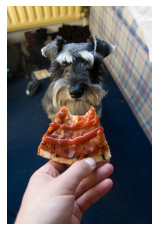

Number of images containing the filter classes: 2202


In [28]:
classname = 'pizza'
filterClasses = [classname]

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses) 
# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))

# load and display a random image
img = coco.loadImgs(imgIds[324])[0]
I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.show() 

classes = [classname]

images = []
if classes!=None:
    # iterate for each individual class in the list
    for className in classes:
        # get all images containing given class
        catIds = coco.getCatIds(catNms=className)
        imgIds = coco.getImgIds(catIds=catIds)
        images += coco.loadImgs(imgIds)
else:
    imgIds = coco.getImgIds()
    images = coco.loadImgs(imgIds)
    
# Now, filter out the repeated images    
unique_images = []
for i in range(len(images)):
    if images[i] not in unique_images:
        unique_images.append(images[i])

dataset_size = len(unique_images)

print("Number of images containing the filter classes:", dataset_size)

images = []
x = 0
for j in unique_images:  
    try:
        I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,j['file_name']))/255.0 
        mask = np.zeros((j['height'],j['width']))
        annIds = coco.getAnnIds(imgIds=j['id'], catIds=catIds, iscrowd=None)
        anns = coco.loadAnns(annIds)
        for i in range(len(anns)):
            className = getClassName(anns[i]['category_id'], cats)
            pixel_value = filterClasses.index(className)+1
            mask = np.maximum(coco.annToMask(anns[i])*pixel_value, mask)
        emask = np.empty((mask.shape[0],mask.shape[1],3))
        emask[:,:,0] = mask
        emask[:,:,1] = mask
        emask[:,:,2] = mask
        emask = emask * I   
        x = x + 1 
        images.append(emask) 
    except:
        pass
    
for i in range(0,len(images)):
    try:
        matplotlib.image.imsave('{cname}/{cname}{no}.png'.format(cname = classname, no = i), cv2.resize(images[i],(250, 250), interpolation = cv2.INTER_AREA))
    except Exception as e: 
        pass

Number of images containing all the  classes: 1645


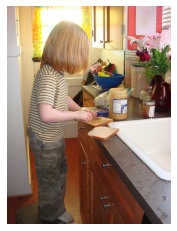

Number of images containing the filter classes: 1645


In [29]:
classname = 'sandwich'
filterClasses = [classname]

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses) 
# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))

# load and display a random image
img = coco.loadImgs(imgIds[324])[0]
I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.show() 

classes = [classname]

images = []
if classes!=None:
    # iterate for each individual class in the list
    for className in classes:
        # get all images containing given class
        catIds = coco.getCatIds(catNms=className)
        imgIds = coco.getImgIds(catIds=catIds)
        images += coco.loadImgs(imgIds)
else:
    imgIds = coco.getImgIds()
    images = coco.loadImgs(imgIds)
    
# Now, filter out the repeated images    
unique_images = []
for i in range(len(images)):
    if images[i] not in unique_images:
        unique_images.append(images[i])

dataset_size = len(unique_images)

print("Number of images containing the filter classes:", dataset_size)

images = []
x = 0
for j in unique_images:  
    try:
        I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,j['file_name']))/255.0 
        mask = np.zeros((j['height'],j['width']))
        annIds = coco.getAnnIds(imgIds=j['id'], catIds=catIds, iscrowd=None)
        anns = coco.loadAnns(annIds)
        for i in range(len(anns)):
            className = getClassName(anns[i]['category_id'], cats)
            pixel_value = filterClasses.index(className)+1
            mask = np.maximum(coco.annToMask(anns[i])*pixel_value, mask)
        emask = np.empty((mask.shape[0],mask.shape[1],3))
        emask[:,:,0] = mask
        emask[:,:,1] = mask
        emask[:,:,2] = mask
        emask = emask * I   
        x = x + 1 
        images.append(emask) 
    except:
        pass
    
for i in range(0,len(images)):
    try:
        matplotlib.image.imsave('{cname}/{cname}{no}.png'.format(cname = classname, no = i), cv2.resize(images[i],(250, 250), interpolation = cv2.INTER_AREA))
    except Exception as e: 
        pass

In [2]:
from PIL import *

In [3]:
def loadDatset():
    x_train =  []
    classnames = []
    # image_path = ""
    #path = os.getcwd()
    path1 = 'data'
    print(path1)
    dirnames= os.listdir(path1)
    print(dirnames)
    for dirname in dirnames:
        count=0
        if dirname != '.DS_Store':
            newPath = 'data/{}'.format(dirname)
            print(newPath)
            imagenames = os.listdir(newPath)
        
            for imnames in imagenames:
                if(imnames!= '.DS_Store'):
                    data = np.array(Image.open('data/{}/{}'.format(dirname,imnames)))[...,:3] 
                    x_train.append(data)
                    classnames.append(dirname) 
    
    return x_train, classnames

In [4]:
train,label = loadDatset()

data
['apple', 'sandwich', '.DS_Store', 'donut', 'broccoli', 'banana', 'pizza', 'orange']
data/apple
data/sandwich
data/donut
data/broccoli
data/banana
data/pizza
data/orange


In [110]:
imagenames = os.listdir("other")
cnt = 0 
for imnames in imagenames: 
    if(imnames!= '.DS_Store'): 
        cnt = cnt + 1
        img = mpimg.imread('other/{}'.format(imnames))
        img = cv2.resize(img, (250,250))   
        train.append(img)
        label.append("other") 

In [111]:
print(cnt)

1288


In [5]:
y_t = np.array(label)
x_train_array = np.empty((len(train), 250, 250, 3))

In [6]:
len(train)

9772

In [7]:
x_train_array.shape

(9772, 250, 250, 3)

In [8]:
j = 0 
for i in train:
    if np.shape(i) == (250,250,3):
        x_train_array[j,: ,:,:] = np.array(i)/255;
        np.delete(y_t,j)
        j += 1

In [20]:
x = set(y_t)

In [21]:
x

{'apple', 'banana', 'broccoli', 'donut', 'orange', 'pizza', 'sandwich'}

(250, 250, 3)
pizza


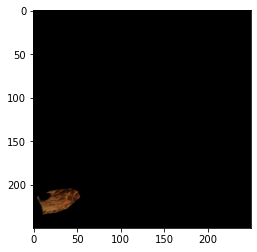

In [9]:
no=7398
print(x_train_array[no].shape)
plt.imshow(x_train_array[no])
print(y_t[no])

In [10]:
x_train_array, y_t = shuffle(x_train_array, y_t)

In [11]:
np.save("batch1_train", x_train_array[0:2100])
np.save("batch1_label", y_t[0:2100])

In [12]:
np.save("batch2_train", x_train_array[2101:4200])
np.save("batch2_label", y_t[2101:4200])

In [13]:
np.save("batch3_train", x_train_array[4201:6300])
np.save("batch3_label", y_t[4201:6300])

In [14]:
np.save("batch4_train", x_train_array[6301:8400])
np.save("batch4_label", y_t[6301:8400])

In [15]:
np.save("batch5_train", x_train_array[8401:])
np.save("batch5_label", y_t[8401:])

In [3]:
dataDir='./COCOdataset2014'
dataType='val'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

# Initialize the COCO api for instance annotations
coco=COCO(annFile)

# Load the categories in a variable
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)

loading annotations into memory...
Done (t=4.50s)
creating index...
index created!


In [4]:
print(cats)

[{'supercategory': 'person', 'id': 1, 'name': 'person'}, {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}, {'supercategory': 'vehicle', 'id': 3, 'name': 'car'}, {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}, {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}, {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}, {'supercategory': 'vehicle', 'id': 7, 'name': 'train'}, {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}, {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}, {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}, {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}, {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}, {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}, {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}, {'supercategory': 'animal', 'id': 16, 'name': 'bird'}, {'supercategory': 'animal', 'id': 17, 'name': 'cat'}, {'supercategory': 'animal', 'id': 18, 'name': 'dog'}, {'supercategory

In [5]:
def getClassName(classID, cats):
    for i in range(len(cats)):
        if cats[i]['id']==classID:
            return cats[i]['name']
    return "None"
print('The class name is', getClassName(52, cats))



The class name is banana


Number of images containing all the  classes: 523


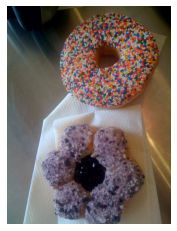

In [7]:
classname = 'donut'
filterClasses = [classname]

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses) 
# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))

# load and display a random image
img = coco.loadImgs(imgIds[324])[0]
I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.show() 

Number of images containing all the  classes: 523


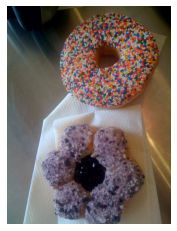

Number of images containing the filter classes: 523


In [12]:
classname = 'donut'
filterClasses = [classname]

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses) 
# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))

# load and display a random image
img = coco.loadImgs(imgIds[324])[0]
I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.show() 

classes = [classname]

images = []
if classes!=None:
    # iterate for each individual class in the list
    for className in classes:
        # get all images containing given class
        catIds = coco.getCatIds(catNms=className)
        imgIds = coco.getImgIds(catIds=catIds)
        images += coco.loadImgs(imgIds)
else:
    imgIds = coco.getImgIds()
    images = coco.loadImgs(imgIds)
    
# Now, filter out the repeated images    
unique_images = []
for i in range(len(images)):
    if images[i] not in unique_images:
        unique_images.append(images[i])

dataset_size = len(unique_images)

print("Number of images containing the filter classes:", dataset_size)

images = []
x = 0
for j in unique_images:  
    try:
        I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,j['file_name']))/255.0  
        images.append(I) 
    except:
        pass
    
for i in range(0,len(images)):
    if(i>150):
        break
    try:
        matplotlib.image.imsave('{cname}_val/{cname}{no}.png'.format(cname = classname, no = i), cv2.resize(images[i],(250, 250), interpolation = cv2.INTER_AREA))
    except Exception as e:  
        pass

Number of images containing all the  classes: 491


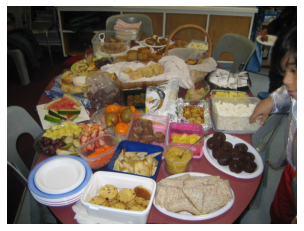

Number of images containing the filter classes: 491


In [13]:
classname = 'apple'
filterClasses = [classname]

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses) 
# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))

# load and display a random image
img = coco.loadImgs(imgIds[324])[0]
I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.show() 

classes = [classname]

images = []
if classes!=None:
    # iterate for each individual class in the list
    for className in classes:
        # get all images containing given class
        catIds = coco.getCatIds(catNms=className)
        imgIds = coco.getImgIds(catIds=catIds)
        images += coco.loadImgs(imgIds)
else:
    imgIds = coco.getImgIds()
    images = coco.loadImgs(imgIds)
    
# Now, filter out the repeated images    
unique_images = []
for i in range(len(images)):
    if images[i] not in unique_images:
        unique_images.append(images[i])

dataset_size = len(unique_images)

print("Number of images containing the filter classes:", dataset_size)

images = []
x = 0
for j in unique_images:  
    try:
        I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,j['file_name']))/255.0  
        images.append(I) 
    except:
        pass
    
for i in range(0,len(images)):
    if(i>150):
        break
    try:
        matplotlib.image.imsave('{cname}_val/{cname}{no}.png'.format(cname = classname, no = i), cv2.resize(images[i],(250, 250), interpolation = cv2.INTER_AREA))
    except Exception as e:  
        pass

Number of images containing all the  classes: 969


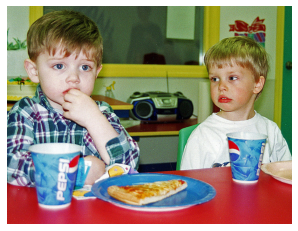

Number of images containing the filter classes: 969


In [14]:
classname = 'cake'
filterClasses = [classname]

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses) 
# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))

# load and display a random image
img = coco.loadImgs(imgIds[324])[0]
I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.show() 

classes = [classname]

images = []
if classes!=None:
    # iterate for each individual class in the list
    for className in classes:
        # get all images containing given class
        catIds = coco.getCatIds(catNms=className)
        imgIds = coco.getImgIds(catIds=catIds)
        images += coco.loadImgs(imgIds)
else:
    imgIds = coco.getImgIds()
    images = coco.loadImgs(imgIds)
    
# Now, filter out the repeated images    
unique_images = []
for i in range(len(images)):
    if images[i] not in unique_images:
        unique_images.append(images[i])

dataset_size = len(unique_images)

print("Number of images containing the filter classes:", dataset_size)

images = []
x = 0
for j in unique_images:  
    try:
        I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,j['file_name']))/255.0  
        images.append(I) 
    except:
        pass
    
for i in range(0,len(images)):
    if(i>150):
        break
    try:
        matplotlib.image.imsave('{cname}_val/{cname}{no}.png'.format(cname = classname, no = i), cv2.resize(images[i],(250, 250), interpolation = cv2.INTER_AREA))
    except Exception as e:  
        pass

Number of images containing all the  classes: 728


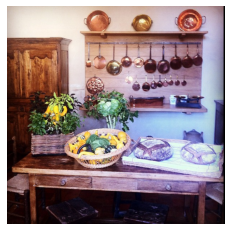

Number of images containing the filter classes: 728


In [15]:
classname = 'banana'
filterClasses = [classname]

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses) 
# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))

# load and display a random image
img = coco.loadImgs(imgIds[324])[0]
I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.show() 

classes = [classname]

images = []
if classes!=None:
    # iterate for each individual class in the list
    for className in classes:
        # get all images containing given class
        catIds = coco.getCatIds(catNms=className)
        imgIds = coco.getImgIds(catIds=catIds)
        images += coco.loadImgs(imgIds)
else:
    imgIds = coco.getImgIds()
    images = coco.loadImgs(imgIds)
    
# Now, filter out the repeated images    
unique_images = []
for i in range(len(images)):
    if images[i] not in unique_images:
        unique_images.append(images[i])

dataset_size = len(unique_images)

print("Number of images containing the filter classes:", dataset_size)

images = []
x = 0
for j in unique_images:  
    try:
        I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,j['file_name']))/255.0  
        images.append(I) 
    except:
        pass
    
for i in range(0,len(images)):
    if(i>150):
        break
    try:
        matplotlib.image.imsave('{cname}_val/{cname}{no}.png'.format(cname = classname, no = i), cv2.resize(images[i],(250, 250), interpolation = cv2.INTER_AREA))
    except Exception as e:  
        pass

Number of images containing all the  classes: 670


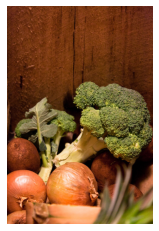

Number of images containing the filter classes: 670


In [17]:
classname = 'broccoli'
filterClasses = [classname]

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses) 
# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))

# load and display a random image
img = coco.loadImgs(imgIds[324])[0]
I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.show() 

classes = [classname]

images = []
if classes!=None:
    # iterate for each individual class in the list
    for className in classes:
        # get all images containing given class
        catIds = coco.getCatIds(catNms=className)
        imgIds = coco.getImgIds(catIds=catIds)
        images += coco.loadImgs(imgIds)
else:
    imgIds = coco.getImgIds()
    images = coco.loadImgs(imgIds)
    
# Now, filter out the repeated images    
unique_images = []
for i in range(len(images)):
    if images[i] not in unique_images:
        unique_images.append(images[i])

dataset_size = len(unique_images)

print("Number of images containing the filter classes:", dataset_size)

images = []
x = 0
for j in unique_images:  
    try:
        I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,j['file_name']))/255.0  
        images.append(I) 
    except:
        pass
    
for i in range(0,len(images)):
    if(i>150):
        break
    try:
        matplotlib.image.imsave('{cname}_val/{cname}{no}.png'.format(cname = classname, no = i), cv2.resize(images[i],(250, 250), interpolation = cv2.INTER_AREA))
    except Exception as e:  
        pass

Number of images containing all the  classes: 818


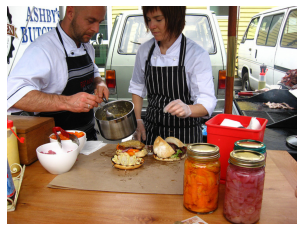

Number of images containing the filter classes: 818


In [18]:
classname = 'sandwich'
filterClasses = [classname]

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses) 
# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))

# load and display a random image
img = coco.loadImgs(imgIds[324])[0]
I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.show() 

classes = [classname]

images = []
if classes!=None:
    # iterate for each individual class in the list
    for className in classes:
        # get all images containing given class
        catIds = coco.getCatIds(catNms=className)
        imgIds = coco.getImgIds(catIds=catIds)
        images += coco.loadImgs(imgIds)
else:
    imgIds = coco.getImgIds()
    images = coco.loadImgs(imgIds)
    
# Now, filter out the repeated images    
unique_images = []
for i in range(len(images)):
    if images[i] not in unique_images:
        unique_images.append(images[i])

dataset_size = len(unique_images)

print("Number of images containing the filter classes:", dataset_size)

images = []
x = 0
for j in unique_images:  
    try:
        I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,j['file_name']))/255.0  
        images.append(I) 
    except:
        pass
    
for i in range(0,len(images)):
    if(i>150):
        break
    try:
        matplotlib.image.imsave('{cname}_val/{cname}{no}.png'.format(cname = classname, no = i), cv2.resize(images[i],(250, 250), interpolation = cv2.INTER_AREA))
    except Exception as e:  
        pass

Number of images containing all the  classes: 1117


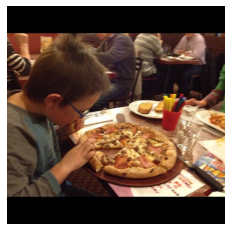

Number of images containing the filter classes: 1117


In [19]:
classname = 'pizza'
filterClasses = [classname]

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses) 
# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))

# load and display a random image
img = coco.loadImgs(imgIds[324])[0]
I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.show() 

classes = [classname]

images = []
if classes!=None:
    # iterate for each individual class in the list
    for className in classes:
        # get all images containing given class
        catIds = coco.getCatIds(catNms=className)
        imgIds = coco.getImgIds(catIds=catIds)
        images += coco.loadImgs(imgIds)
else:
    imgIds = coco.getImgIds()
    images = coco.loadImgs(imgIds)
    
# Now, filter out the repeated images    
unique_images = []
for i in range(len(images)):
    if images[i] not in unique_images:
        unique_images.append(images[i])

dataset_size = len(unique_images)

print("Number of images containing the filter classes:", dataset_size)

images = []
x = 0
for j in unique_images:  
    try:
        I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,j['file_name']))/255.0  
        images.append(I) 
    except:
        pass
    
for i in range(0,len(images)):
    if(i>150):
        break
    try:
        matplotlib.image.imsave('{cname}_val/{cname}{no}.png'.format(cname = classname, no = i), cv2.resize(images[i],(250, 250), interpolation = cv2.INTER_AREA))
    except Exception as e:  
        pass

Number of images containing all the  classes: 568


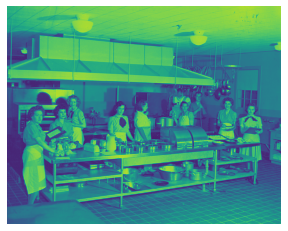

Number of images containing the filter classes: 568


In [20]:
classname = 'orange'
filterClasses = [classname]

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses) 
# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))

# load and display a random image
img = coco.loadImgs(imgIds[324])[0]
I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.show() 

classes = [classname]

images = []
if classes!=None:
    # iterate for each individual class in the list
    for className in classes:
        # get all images containing given class
        catIds = coco.getCatIds(catNms=className)
        imgIds = coco.getImgIds(catIds=catIds)
        images += coco.loadImgs(imgIds)
else:
    imgIds = coco.getImgIds()
    images = coco.loadImgs(imgIds)
    
# Now, filter out the repeated images    
unique_images = []
for i in range(len(images)):
    if images[i] not in unique_images:
        unique_images.append(images[i])

dataset_size = len(unique_images)

print("Number of images containing the filter classes:", dataset_size)

images = []
x = 0
for j in unique_images:  
    try:
        I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,j['file_name']))/255.0  
        images.append(I) 
    except:
        pass
    
for i in range(0,len(images)):
    if(i>150):
        break
    try:
        matplotlib.image.imsave('{cname}_val/{cname}{no}.png'.format(cname = classname, no = i), cv2.resize(images[i],(250, 250), interpolation = cv2.INTER_AREA))
    except Exception as e:  
        pass

In [63]:
from PIL import *

In [64]:
def loadDatset():
    x_train =  []
    classnames = []
    # image_path = ""
    #path = os.getcwd()
    path1 = 'val_data'
    print(path1)
    dirnames= os.listdir(path1)
    print(dirnames)
    for dirname in dirnames:
        count=0
        if dirname != '.DS_Store':
            newPath = 'val_data/{}'.format(dirname)
            print(newPath)
            imagenames = os.listdir(newPath)
        
            for imnames in imagenames:
                if(imnames!= '.DS_Store'):
                    data = np.array(Image.open('val_data/{}/{}'.format(dirname,imnames)))[...,:3] 
                    x_train.append(data)
                    classnames.append(dirname) 
    
    return x_train, classnames

In [65]:
val,label = loadDatset()

val_data
['apple', 'sandwich', '.DS_Store', 'donut', 'other', 'broccoli', 'banana', 'pizza', 'cake', 'orange']
val_data/apple
val_data/sandwich
val_data/donut
val_data/other
val_data/broccoli
val_data/banana
val_data/pizza
val_data/cake
val_data/orange


In [66]:
y_t = np.array(label)
x_val_array = np.empty((len(label), 250, 250, 3))

In [67]:
len(label)

1039

In [68]:
j = 0 
for i in val:
    if np.shape(i) == (250,250,3):
        x_val_array[j,: ,:,:] = np.array(i)/255;
        np.delete(y_t,j)
        j += 1

apple


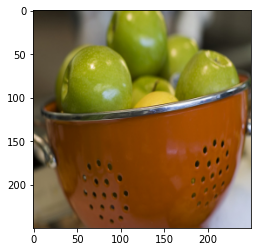

In [69]:
plt.imshow(x_val_array[14])
print(y_t[14])

In [50]:
x_val_array, y_t = shuffle(x_val_array, y_t)

In [70]:
np.save("val", x_val_array)
np.save("label", y_t)